In [1]:
import pandas
import datetime
import seaborn as sns
from sklearn.utils import resample
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
%pylab inline

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/scipy/cluster/vq.py:88: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy
/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/usr/local/lib/python2.7/dist-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/usr/local/lib/python2.7/dist-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fas

In [2]:
colNames = ["date"]
nBins = 1
for _nb in range(nBins):
    colNames += [ "bin_" + str(_nb) ]
colNames += [ "label", "pred_label" ]
for _nb in range(nBins):
    # there are 2 probs for each bin
    # one zero prob and other 1 prob
    colNames += [ "prob_type_0_b_" + str(_nb) ]
    colNames += [ "prob_type_1_b_" + str(_nb) ]

In [3]:
predDF = pandas.read_csv("../data/test_data_pred.csv", names=colNames,\
                     header=0, parse_dates=["date"])
predDF['hour'] = pandas.DatetimeIndex(predDF['date']).hour
# to calculate roc we'll need two bins for two classes
predDF["label_0"] = [ 1 if x==0 else 0 for x in predDF["label"] ]
predDF["label_1"] = [ 1 if x==1 else 0 for x in predDF["label"] ]
predDF.head()

,date,bin_0,label,pred_label,prob_type_0_b_0,prob_type_1_b_0,hour,label_0,label_1
0,2015-01-25 14:50:00,0,0,0,0.840578,0.159422,14,1,0
1,2015-01-25 15:15:00,0,0,0,0.713641,0.286359,15,1,0
2,2015-01-25 15:30:00,0,0,0,0.647753,0.352247,15,1,0
3,2015-01-25 16:30:00,0,0,0,0.703436,0.296564,16,1,0
4,2015-01-25 17:30:00,0,0,0,0.709216,0.290784,17,1,0


In [4]:
actBinLabArr = predDF[["label_0", "label_1"]].values
predProbArr = predDF[["prob_type_0_b_0", "prob_type_1_b_0"]].values
# get the roc and auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(actBinLabArr[:, i], predProbArr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [5]:
print roc_auc

{0: 0.8277456714142135, 1: 0.8277456737086178}


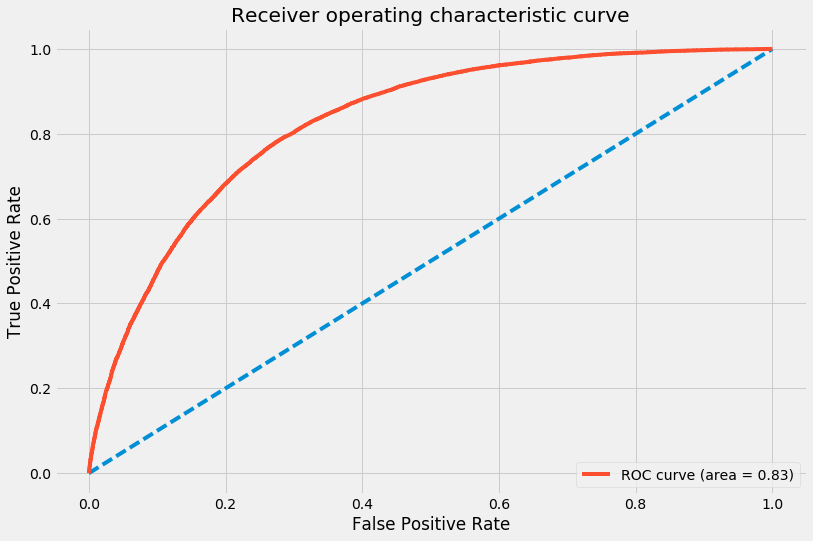

In [6]:
binLab=1
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([0, 1], [0, 1], linestyle='--')
ax.plot(fpr[binLab], tpr[binLab], label='ROC curve (area = %0.2f)' % roc_auc[binLab])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
fig.savefig("../plots/roc_auc.png")